In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading dataset

In [2]:
df = pd.read_csv('students_adaptability_level_online_education.csv')

In [3]:
df.sample(5)

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
853,Girl,11-15,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,1-3,No,Mobile,Low
1088,Boy,21-25,University,Government,No,Yes,Low,Mid,Mobile Data,4G,0,No,Mobile,Low
319,Girl,11-15,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,1-3,No,Mobile,Low
261,Boy,21-25,University,Non Government,Yes,Yes,Low,Mid,Mobile Data,3G,3-6,Yes,Mobile,Low
336,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Low


In [4]:
df.nunique()

Gender                 2
Age                    6
Education Level        3
Institution Type       2
IT Student             2
Location               2
Load-shedding          2
Financial Condition    3
Internet Type          2
Network Type           3
Class Duration         3
Self Lms               2
Device                 3
Adaptivity Level       3
dtype: int64

In [ ]:
#converting to category type

In [5]:
for col in df.columns:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Gender               1205 non-null   category
 1   Age                  1205 non-null   category
 2   Education Level      1205 non-null   category
 3   Institution Type     1205 non-null   category
 4   IT Student           1205 non-null   category
 5   Location             1205 non-null   category
 6   Load-shedding        1205 non-null   category
 7   Financial Condition  1205 non-null   category
 8   Internet Type        1205 non-null   category
 9   Network Type         1205 non-null   category
 10  Class Duration       1205 non-null   category
 11  Self Lms             1205 non-null   category
 12  Device               1205 non-null   category
 13  Adaptivity Level     1205 non-null   category
dtypes: category(14)
memory usage: 18.4 KB


In [ ]:
#visualising data and features

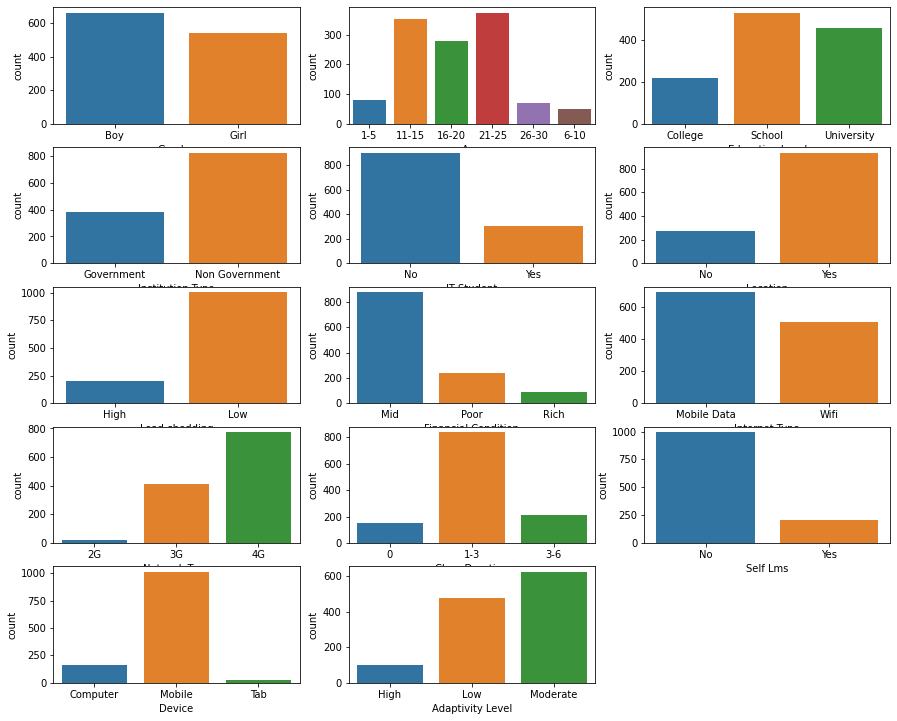

In [6]:
i = 1
plt.figure(figsize = (15,15))
for feature in df:
    plt.subplot(6,3,i)
    sns.countplot(x = feature ,  data = df)
    i +=1

In [ ]:
Conclusions from the presented graphs:

Variable study Gender is balanced, applied to the same number of men and women to obtain a relevant result.

most of the subjects correspond to the age of 11–25 years.
Values ​​are contributed by the level of education indicates that most of the subjects have only a school education. 
These data correlate with a certain schedule, where most of the subjects are in the age range from 7 to 20 years. 
Existing education services are provided by non-private institutions. This is due to the development of the education market.
It should also be noted that most of the commercials are sold on the phone through the 4G network, which shows that people get education in any place convenient for them.
It should be noted that some of the online courses are not assimilated by students.

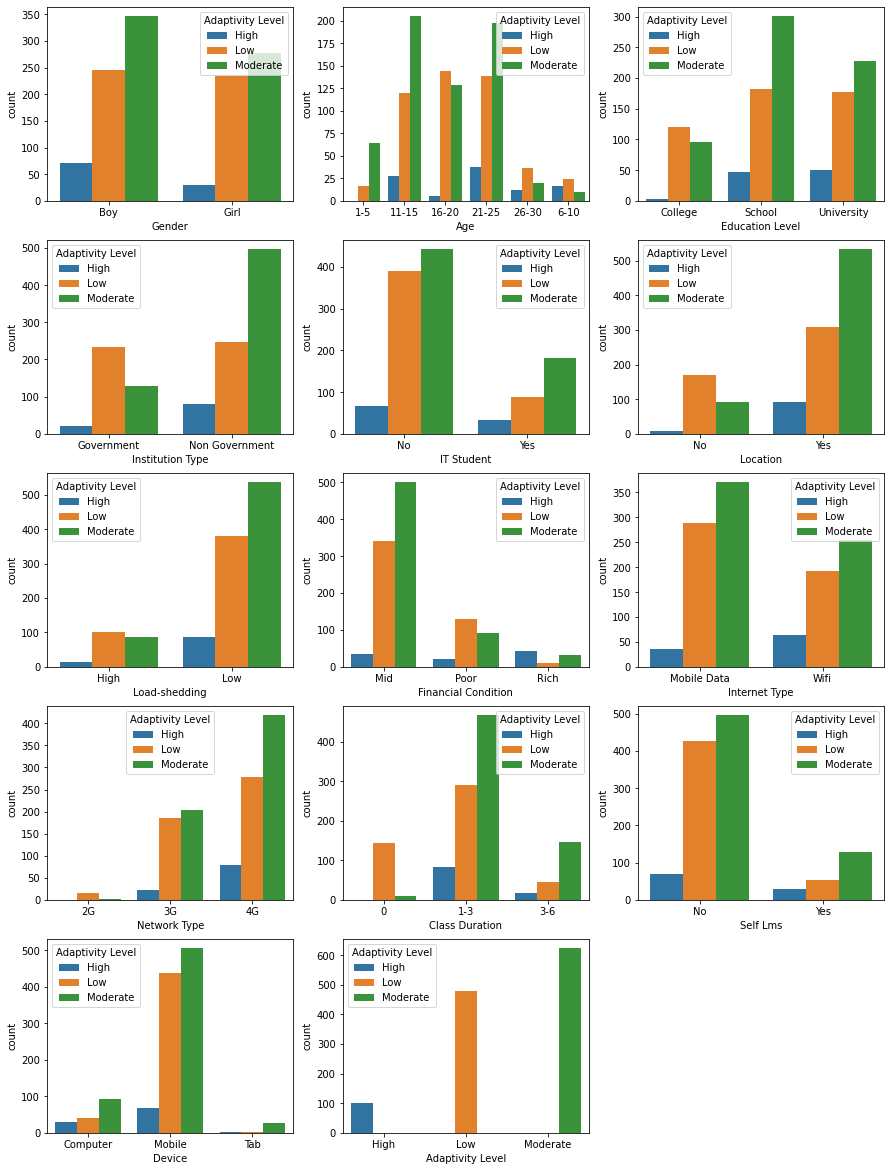

In [7]:
i = 1
plt.figure(figsize = (15,25))
for feature in df:
    plt.subplot(6,3,i)
    sns.countplot(x = feature , hue='Adaptivity Level', data = df)
    i +=1

In [ ]:
Conclusions from the obtained distributions:

Men are easier to adapt to new knowledge, the level of poor adaptation between men and women is approximately the same.
The best adaptation is shown at the age of 21-25, and 11-15, the worst - after 26 years and in the interval from 16 to 20 years. Worse adaptation to new knowledge can be explained by social and physiological factors.
It should also be noted that the best digestibility of the material is observed in the middle class. We can talk about this phenomenon for a very long time :)
high adaptation to the material is also noted among urban residents, this is due to social and economic factors.
The level of adaptation to new knowledge also depends on the quality of the Internet.

In [ ]:
#Encoding data

In [8]:
from sklearn.preprocessing import OrdinalEncoder

In [9]:
scaler = OrdinalEncoder()
names = df.columns
d = scaler.fit_transform(df)

scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,0.0,3.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0,0.0,2.0,2.0
1,1.0,3.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,2.0
2,1.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,1.0,0.0,1.0,2.0
3,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0,2.0
4,1.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0


In [ ]:
!pip install imblearn

In [ ]:
#model training

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from imblearn.over_sampling import SMOTE 

In [11]:
oversample = SMOTE()
features, labels=  oversample.fit_resample(scaled_df.drop(["Adaptivity Level"],axis=1),scaled_df["Adaptivity Level"])

In [12]:
X_train, X_test, y_train, y_test=train_test_split(features, labels,test_size=0.20,random_state=7)

In [13]:
models = [RandomForestClassifier()]
scores = dict()

for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)

    print(f'model: {str(m)}')
    print(classification_report(y_test,y_pred, zero_division=1))
    print('-'*30, '\n')

model: RandomForestClassifier()
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96       127
         1.0       0.91      0.99      0.95       115
         2.0       0.99      0.84      0.91       133

    accuracy                           0.94       375
   macro avg       0.94      0.94      0.94       375
weighted avg       0.95      0.94      0.94       375

------------------------------ 



In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb

In [ ]:
#applying other algorithm

In [15]:
models = [ KNeighborsClassifier(), SVC(), LogisticRegression(),xgb.XGBClassifier()]
scores = dict()

for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)

    print(f'model: {str(m)}')
    print(classification_report(y_test,y_pred, zero_division=1))
    print('-'*30, '\n')

model: KNeighborsClassifier()
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       127
         1.0       0.85      0.85      0.85       115
         2.0       0.86      0.76      0.81       133

    accuracy                           0.87       375
   macro avg       0.87      0.87      0.87       375
weighted avg       0.87      0.87      0.87       375

------------------------------ 

model: SVC()
              precision    recall  f1-score   support

         0.0       0.78      0.89      0.83       127
         1.0       0.82      0.76      0.79       115
         2.0       0.74      0.69      0.71       133

    accuracy                           0.78       375
   macro avg       0.78      0.78      0.78       375
weighted avg       0.78      0.78      0.78       375

------------------------------ 

model: LogisticRegression()
              precision    recall  f1-score   support

         0.0       0.75      0.72      0.74   

In [ ]:
#random forest fetches the best results

In [16]:
model=RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred, zero_division=1))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96       127
         1.0       0.91      0.99      0.95       115
         2.0       0.99      0.84      0.91       133

    accuracy                           0.94       375
   macro avg       0.94      0.94      0.94       375
weighted avg       0.95      0.94      0.94       375



In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

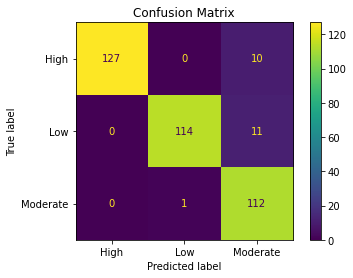

In [18]:
cm = confusion_matrix(model.predict(X_test),y_test)
disp = ConfusionMatrixDisplay(cm, display_labels=["High","Low","Moderate"])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#weightes of different features

In [19]:
feature_importances=model.feature_importances_
feature_importances_df=pd.DataFrame({'features':list(X_train), 'feature_importances':feature_importances})
feature_importances_df=pd.DataFrame({'features':list(X_train), 'feature_importances':feature_importances})
feature_importances_df.sort_values('feature_importances',ascending=False)

,features,feature_importances
7,Financial Condition,0.170011
1,Age,0.130100
10,Class Duration,0.128543
9,Network Type,0.082459
0,Gender,0.081073
3,Institution Type,0.064058
8,Internet Type,0.055361
2,Education Level,0.054447
5,Location,0.052261
11,Self Lms,0.050481


In [ ]:
for col in df.columns:
    df[col] = df[col].astype('category')
df.info()

In [ ]:
df.isnull().sum()